In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
italy_cases = [3, 3, 3, 3, 
               3, 4, 21, 79, 157, 229, 323, 
               470, 655, 889, 1128, 1701, 2036, 2502, 
               3089, 3858, 4636, 5883, 7375, 9172, 10149, 
               12462, 15113, 17660, 21157, 24747, 27980, 31506]
tunisia_population = 11782176 
tunisia_cases_today = 29

In [3]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

days = np.arange(0,len(italy_cases),1)

popt, pcov = curve_fit(func, days, italy_cases)

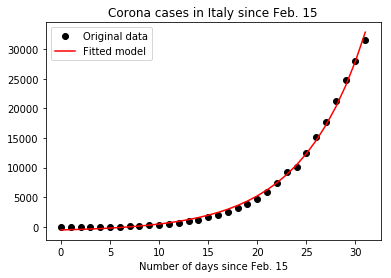

In [4]:
plt.figure()
plt.plot(days, italy_cases, 'ko', label="Original data")
plt.plot(days, func(days, *popt), 'r-', label="Fitted model")
plt.xlabel('Number of days since Feb. 15')
plt.title('Corona cases in Italy since Feb. 15')
plt.legend()
plt.savefig("1.png")
plt.show()

In [5]:
a,b,c = popt

In [6]:
delta = (np.log(tunisia_cases_today-c)-np.log(a)) / b

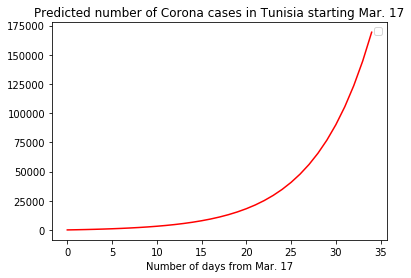

In [7]:
def func(x, a, b, c):
    return a * np.exp(b * (x+delta)) + c

days = np.arange(0,35,1)

plt.figure()
plt.plot(days, func(days, *popt), 'r-')
plt.xlabel('Number of days from Mar. 17')
plt.title('Predicted number of Corona cases in Tunisia starting Mar. 17')
plt.legend()
plt.savefig("2.png")
plt.show()

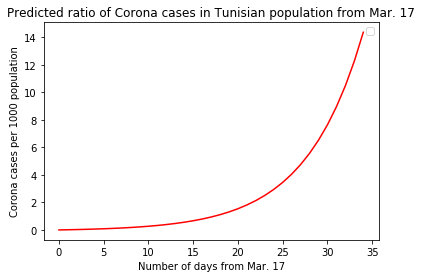

In [8]:
plt.figure()
plt.plot(days, 1e+3 * func(days, *popt)/tunisia_population, 'r-')
plt.xlabel('Number of days from Mar. 17')
plt.ylabel('Corona cases per 1000 population')
plt.title('Predicted ratio of Corona cases in Tunisian population from Mar. 17')
plt.legend()
plt.savefig("3.png")
plt.show()

In [9]:
p = func(days, *popt)/tunisia_population

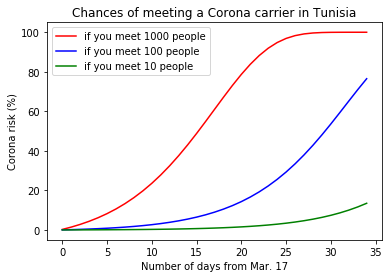

In [10]:
plt.figure()
plt.plot(days, 100 * (1-pow(1-p,1000)), 'r-', label="if you meet 1000 people")
plt.plot(days, 100 * (1-pow(1-p,100)), 'b-', label="if you meet 100 people")
plt.plot(days, 100 * (1-pow(1-p,10)), 'g-', label="if you meet 10 people")
plt.xlabel('Number of days from Mar. 17')
plt.ylabel('Corona risk (%)')
plt.title('Chances of meeting a Corona carrier in Tunisia')
plt.legend()
plt.savefig("4.png")
plt.show()